In [108]:
#그래프 환경설정
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height=9)
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [109]:
#election에 데이터 불러오기
election <- read.csv("../Data/election_2022.csv")
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


In [110]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [111]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [112]:
sum(is.na(eletion))  #Na 합계확인

ERROR: Error in eval(expr, envir, enclos): 객체 'eletion'를 찾을 수 없습니다


In [18]:
#중복된 시군구의 갯수
length(election$`시군구`)-length(unique(election$`시군구`))


[1] 22

In [11]:
#이재명, 윤석렬, 심상정 합계 electionSUM 열로 
election$electionSum <- apply(election[,5:7],1, sum)
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417
2,서울특별시,중구,111448,84998,38244,42906,2310,83460
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [20]:
#3명의 후보가 받은표가 투표수의 몇 퍼센트 인지 구하기
election$electionRatio <- election$electionSum/election$`투표수`*100
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [25]:
#데이터 정렬
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [115]:
#electionRatio가 가장 높은 지역과 가장 낮은 지역 구하기
head(arrange(election, desc(election$electionRatio)),1)
tail(arrange(election, desc(election$electionRatio)),1)

subset(election, max(electionRatio)==electionRatio)
subset(election, min(electionRatio)==electionRatio)


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


ERROR: Error in eval(e, x, parent.frame()): 객체 'electionRatio'를 찾을 수 없습니다


--------------
### 광역시별 투표율을 3D Pie Chart로 표현하기


In [66]:
# 1) 광역시별 합계
election_mg <- aggregate(투표수 ~ 광역시도, election, sum) 
head(election_mg)

# 2) 광역시별 합계를 내림차순으로 정렬
election_data <- arrange(election_mg, desc(election_mg$`투표수`))


,광역시도,투표수
,<chr>,<int>
1,강원도,1015458
2,경기도,8518854
3,경상남도,2146882
4,경상북도,1774284
5,광주광역시,985492
6,대구광역시,1611512


In [67]:
library(plotrix)

In [96]:
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

### 파이차트
par(bg="white")  
  # ratio <- election_data$`투표수` / sum(election_data$`투표수`) * 100
  week <- c("월","화","수","목","금","토")
  ratio <- sales / sum(sales) * 100
  label <- paste(week, "\n", ratio, "%")
  label

pie3D(
  election_data$`투표수`,
  main ="윤석력 후보의 광역시도별 득표율",
  labels = label
)


[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

ERROR: Error in eval(expr, envir, enclos): 객체 'week'를 찾을 수 없습니다


### 윤석열 후보의 광역시도별 득표율을 3D Pie Chart로 표현하기
- 단 ratio가 3%이상만 보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

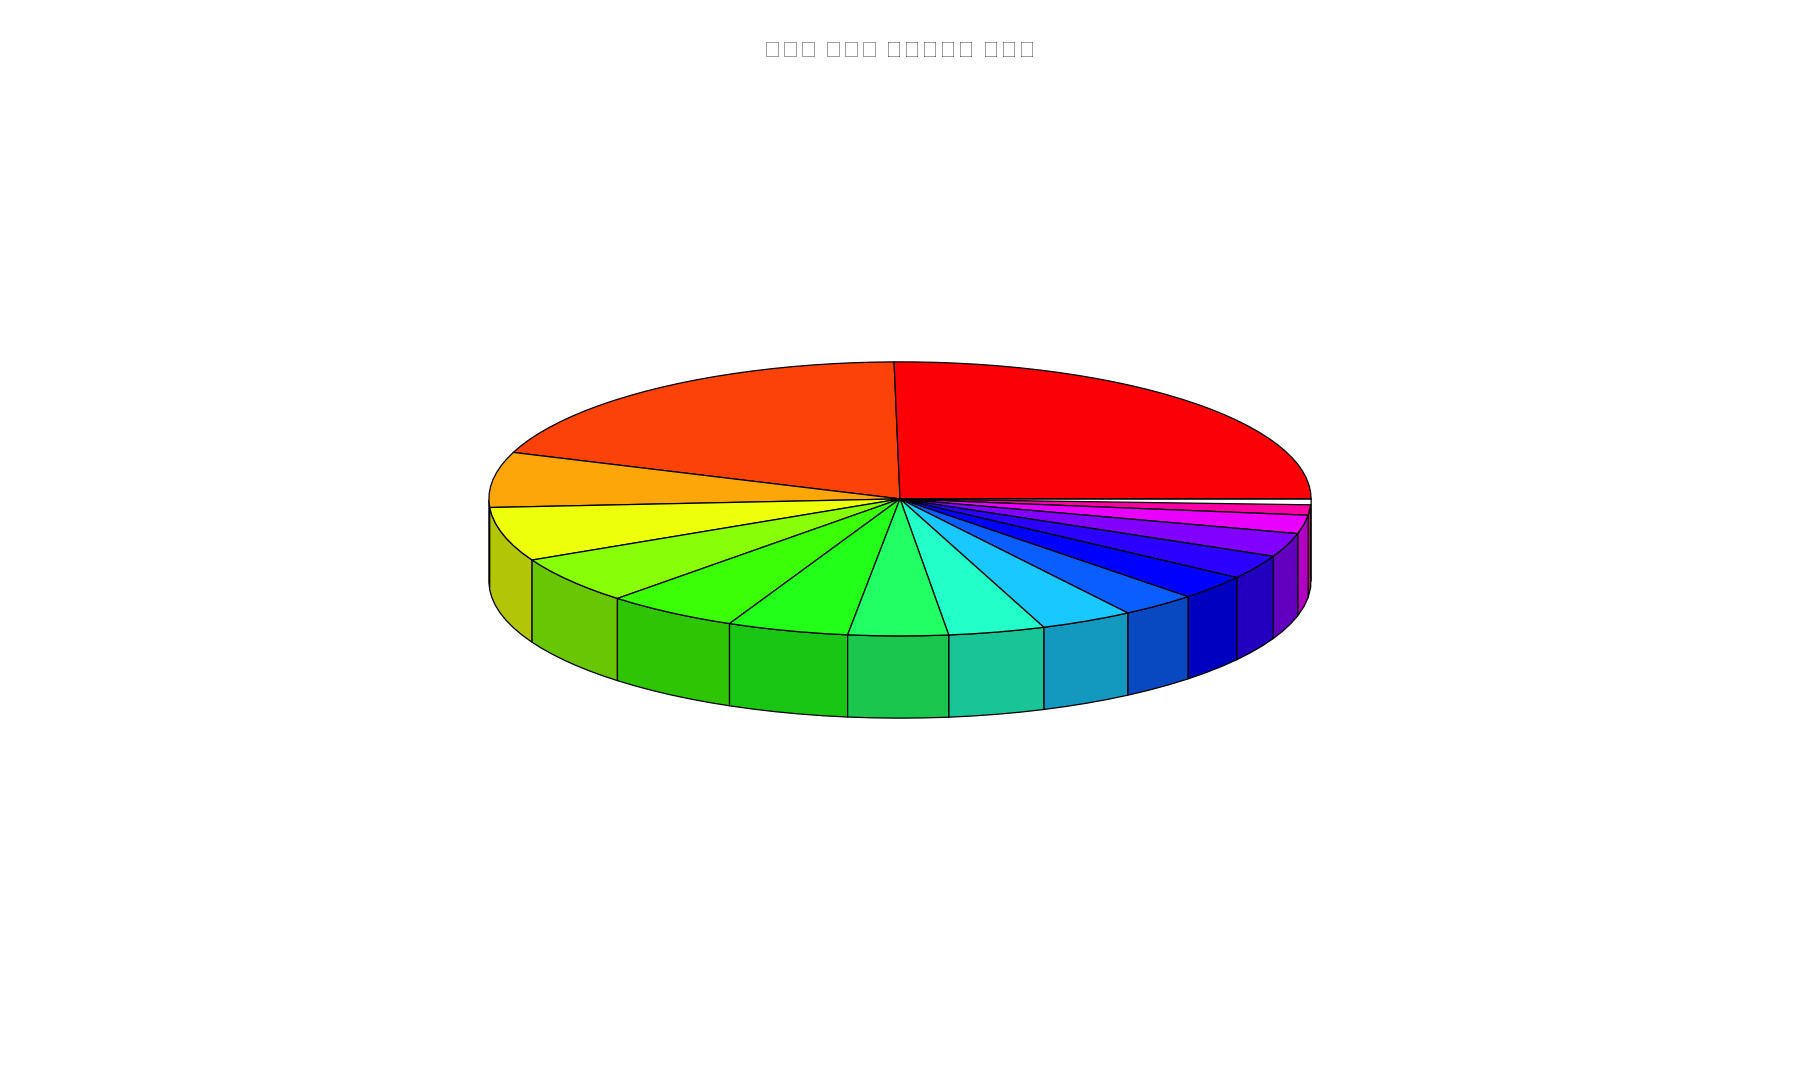

In [107]:
### 파이차트
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기
par(bg="white")  

pie3D(
  election_data$`투표수`,
  main ="윤석렬 후보의 광역시도별 득표율",
  
)

In [128]:
election$electiond윤석렬Ratio <- election$`윤석열`/election$`투표수`*100
head(election)

election$electiond윤석렬3Ratio <- ifelse(election$electiond윤석렬Ratio >= 3,election$electiond윤석렬Ratio,"")
tail(election)
arrange(election_mg, desc(election$electiond윤석렬3Ratio ))
tail(election)
par(bg="white")  

pie3D(
  election$`윤석열`,
  main ="윤석렬 후보의 광역시도별 득표율"
)  
# aggregate(election$ ~ 광역시도, election, sum) 

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,48.86464,48.86464
2,서울특별시,중구,111448,84998,38244,42906,2310,50.47883,50.47883
3,서울특별시,용산구,199077,152068,60063,85047,4374,55.92695,55.92695
4,서울특별시,성동구,252087,197240,84411,103880,5365,52.66680,52.66680
5,서울특별시,광진구,303582,235471,109922,113733,7072,48.30022,48.30022
6,서울특별시,동대문구,300928,232106,108171,112890,6416,48.63726,48.63726


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
243,경상남도,함양군,34459,26955,8526,16957,528,62.90855,62.90855
244,경상남도,산청군,31645,24913,7125,16607,464,66.65998,66.65998
245,경상남도,거창군,53049,41399,11963,27254,895,65.83251,65.83251
246,경상남도,합천군,39768,31270,6911,22742,511,72.72785,72.72785
247,제주특별자치도,제주시,408552,296826,157695,122084,10007,41.12982,41.12982
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591,45.14150,45.14150


ERROR: [1m[33mError[39m in `arrange()`:[22m
[1m[22m[36mℹ[39m In argument: `..1 = election$electiond윤석렬3Ratio`.
[1mCaused by error:[22m
[1m[22m[33m![39m `..1` must be size 17 or 1, not 248.


광역시도,윤석열
<chr>,<int>
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


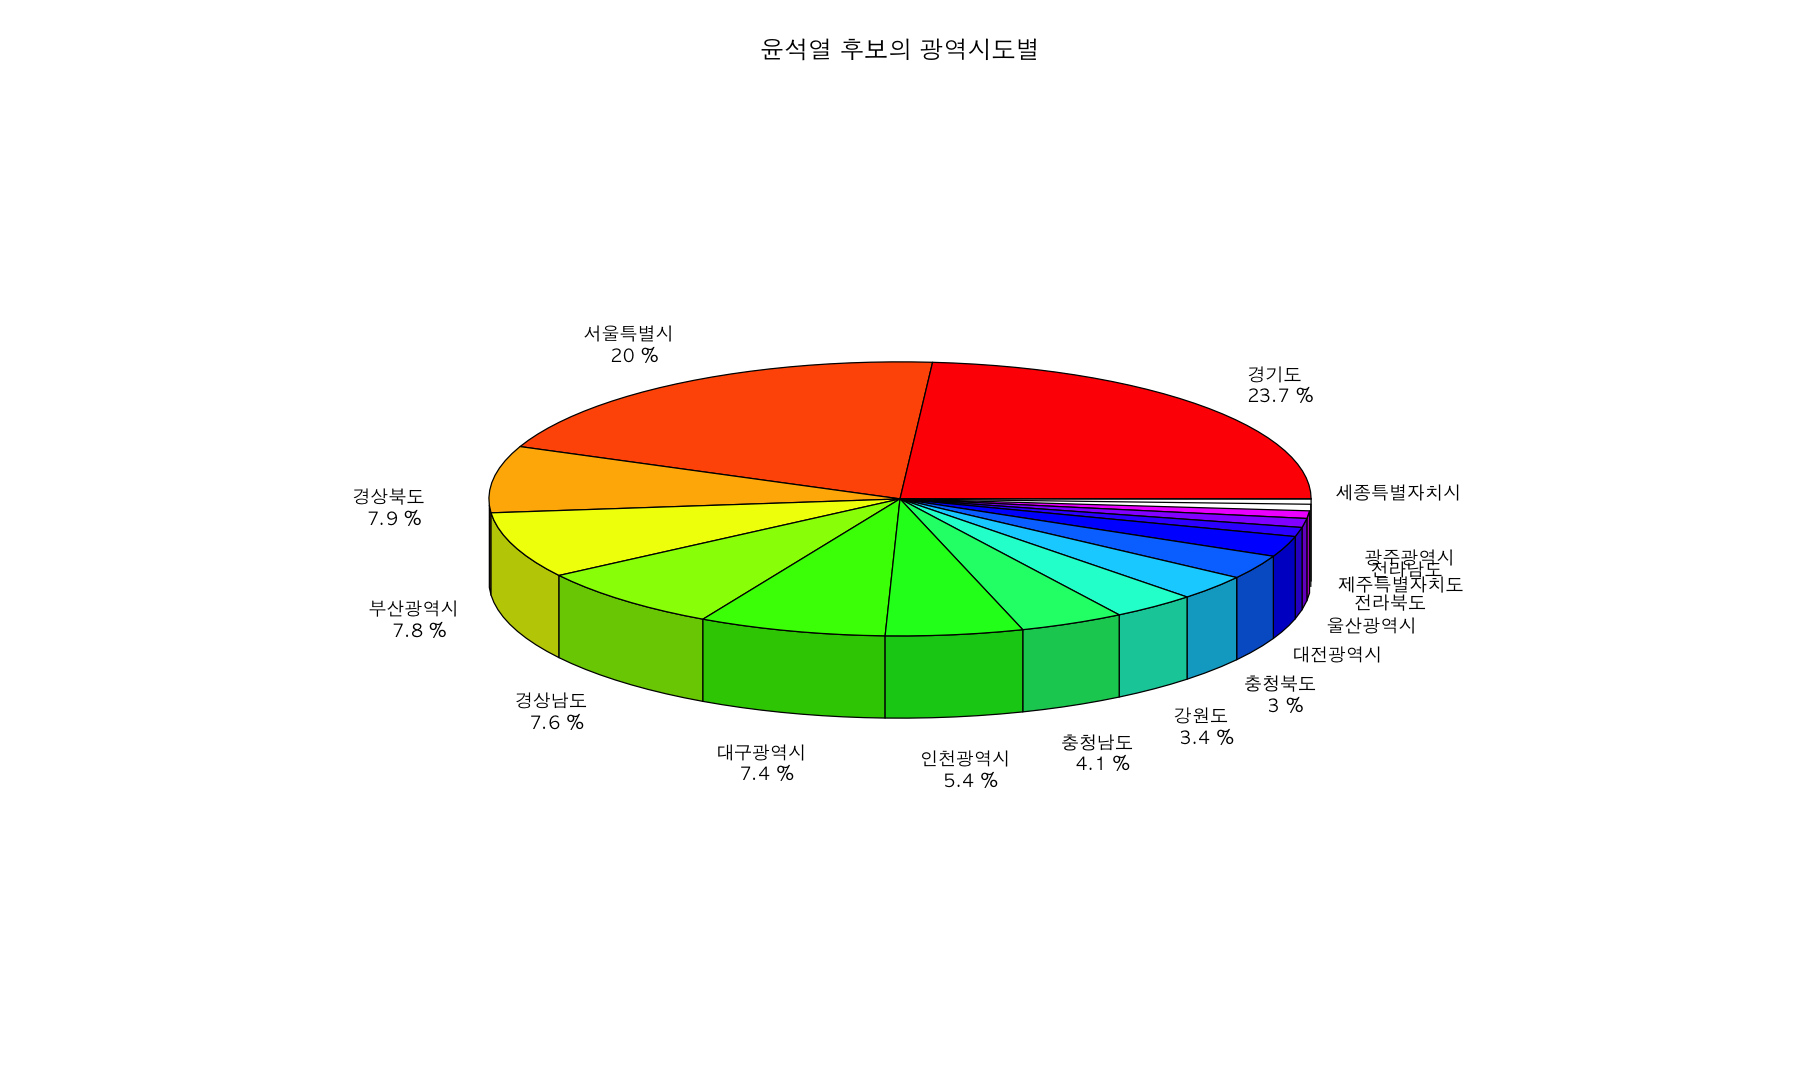

In [136]:
par(bg = "white")
par(family = "AppleGothic")
# 광역시도별 윤석열 후보의 득표수의 합계 및 내림차순정렬
aggregate(윤석열~광역시도, election, sum)
elec_yoon <- arrange(aggregate(윤석열~광역시도, election, sum), desc(윤석열))

# 차트그리기
#1)Ratio
elec_yoon_ratio <- round(elec_yoon$윤석열 / sum(elec_yoon$윤석열) * 100, 1)

#2)Label
elec_yoon_label <- paste(elec_yoon$`광역시도`, ifelse(elec_yoon_ratio >= 3, paste("\n", elec_yoon_ratio,"%"), "" ))

#3)차트
pie3D(
    elec_yoon$`윤석열`,
    main = "윤석열 후보의 광역시도별 득표율",
    labels = elec_yoon_label,
    labelcex = 0.9
)

### 윤석열 후보의 서울 득표 Top의 득표율을 표시하고 나머지 지역은 기타로 합쳐서 득표율 표시하기

In [167]:
# par(bg = "white")
# par(family = "AppleGothic")

# #1윤석열 후보 서울 득표 구
# #1-1) 서울 구 정리
# subset(election, `광역시도` == "서울특별시")

# #1-2) 내림차순
# elec_yoon_seoul<- arrange(subset(election, `광역시도` == "서울특별시"), desc(`electiond윤석렬Ratio`))

# #1-3) 득표율 5
# elec_yoon_seoul5 <- head(elec_yoon_seoul, 5)
# elec_yoon_seoul5


# #2표
# #2-1)ration
# elec_yoon_ratio <- round(elec_yoon_seoul$윤석열 / sum(elec_yoon_seoul$윤석열) * 100, 1)

# #2)Label
# elec_yoon_label <- paste(elec_yoon_seoul$`시군구`, ifelse( , paste("\n", elec_yoon_ratio,"%"), "" ))

# #3)차트
# pie3D(
#     elec_yoon_seoul$`윤석열`,
#     main = "윤석열 후보의 서울 득표율",
#     labels = elec_yoon_label,
#     labelcex = 0.9)

In [137]:
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,48.86464,48.86464
2,서울특별시,중구,111448,84998,38244,42906,2310,50.47883,50.47883
3,서울특별시,용산구,199077,152068,60063,85047,4374,55.92695,55.92695
4,서울특별시,성동구,252087,197240,84411,103880,5365,52.66680,52.66680
5,서울특별시,광진구,303582,235471,109922,113733,7072,48.30022,48.30022
6,서울특별시,동대문구,300928,232106,108171,112890,6416,48.63726,48.63726


In [180]:
# 서울특별시 데이터만 발췌
# 발췌된 데이터중 시군구, 윤석렬 컬럼만
# 상기의 데이터중 1~5등의 시군구 이름과 윤석열 득표수 (1~5등 제외 득표수 합계)

# seubset(election, 광역시도 == "서울특별시") 아래와 같음(파이썬은 아래와 같이씀)
election_seoul <- election[election$`광역시도` == "서울특별시", ] #boolen Indexing검색
head(election_seoul)

election_seoul_yoon <- arrange(election[election$`광역시도` == "서울특별시", ], desc(윤석열))[, c(2,6)] #boolen Indexing검색
head(election_seoul_yoon)


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,48.86464,48.86464
2,서울특별시,중구,111448,84998,38244,42906,2310,50.47883,50.47883
3,서울특별시,용산구,199077,152068,60063,85047,4374,55.92695,55.92695
4,서울특별시,성동구,252087,197240,84411,103880,5365,52.66680,52.66680
5,서울특별시,광진구,303582,235471,109922,113733,7072,48.30022,48.30022
6,서울특별시,동대문구,300928,232106,108171,112890,6416,48.63726,48.63726


,시군구,윤석열
,<chr>,<int>
1,송파구,255166
2,강남구,235897
3,강서구,181510
4,서초구,179472
5,노원구,163340
6,강동구,160593


In [181]:
#Ratio
election_seoul_yoon[1:5,2]
election_seoul_yoon[-c(1:5),2]

[1] 255166 235897 181510 179472 163340

[1] 160593 151944 149780 140666 135733 135044 134846 127129 124327 118201
[11] 113733 112890 103880  99780  98924  86540  85047  69227  49172  42906

In [210]:
#Ratio
election_seoul_yoon_ratio <- round(c(election_seoul_yoon[1:5,2], sum(election_seoul_yoon[-c(1:5),2]))/sum(election_seoul_yoon$윤석열)*100,2)
election_seoul_yoon_ratio 

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [190]:
#labele
election_seoul_yoon_label <- paste(c(election_seoul_yoon$`시군구`[1:5], '기타'), "\n", election_seoul_yoon_ratio, "%")

election_seoul_yoon_label

[1] "송파구 \n 7.84 %" "강남구 \n 7.25 %" "강서구 \n 5.58 %" "서초구 \n 5.51 %"
[5] "노원구 \n 5.02 %" "기타 \n 68.81 %"

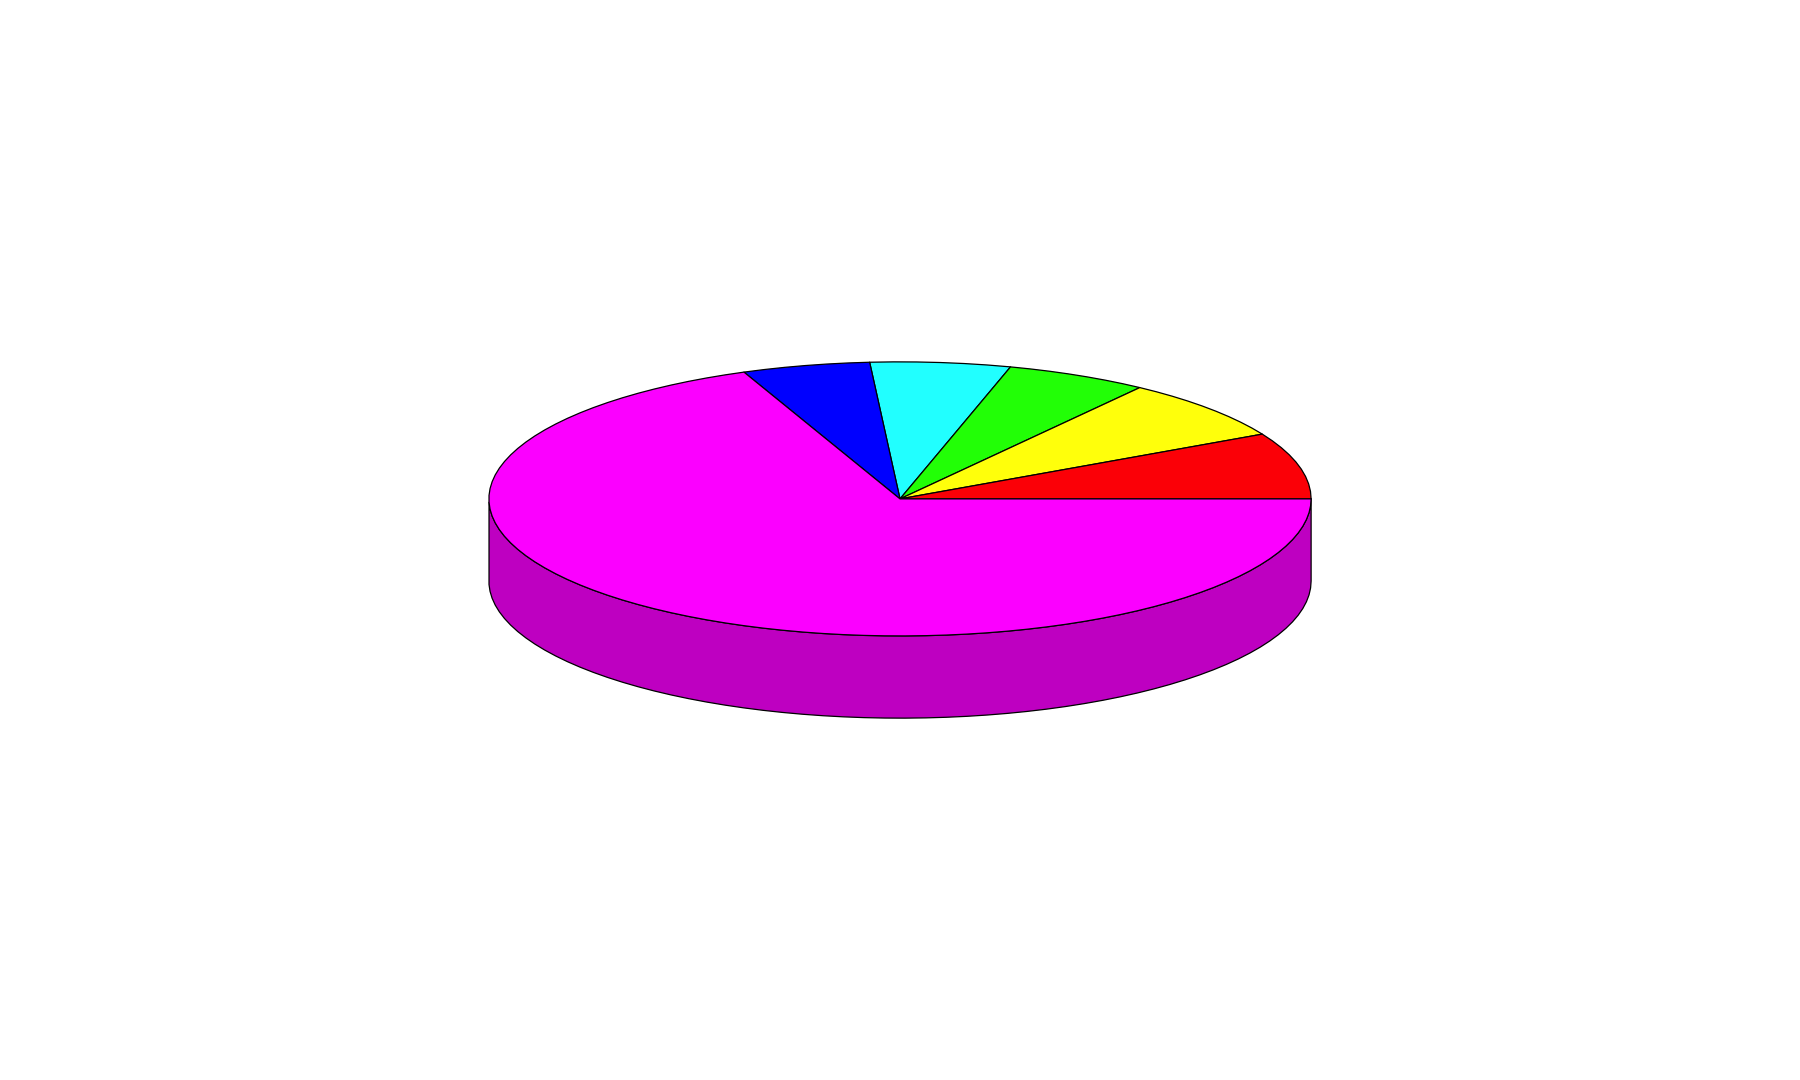

In [191]:
pie3D(
    election_seoul_yoon_ratio
)

### 대선주자 출생지별 득표율 분석
 - 윤석열 후보의 출생지는 서울특별시 성북구
 - 국민의힘(red), 민주당(sky blue), 정의당(yellow), 기타(gray)
 

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,48.86464,48.86464
2,서울특별시,중구,111448,84998,38244,42906,2310,50.47883,50.47883
3,서울특별시,용산구,199077,152068,60063,85047,4374,55.92695,55.92695
4,서울특별시,성동구,252087,197240,84411,103880,5365,52.66680,52.66680
5,서울특별시,광진구,303582,235471,109922,113733,7072,48.30022,48.30022
6,서울특별시,동대문구,300928,232106,108171,112890,6416,48.63726,48.63726


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
8,서울특별시,성북구,375880,292187,142702,135044,8952,46.21835,46.21835


[1] 142702

[1] 135044

[1] 8952

[1] 5489

[1] 292187

[1] 48.84 46.22  3.06

[1] "142702 \n 48.84 %" "135044 \n 46.22 %" "8952 \n 3.06 %"   
[4] "기타 \n 48.84 %"

ERROR: Error in if (labelsep < minsep) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


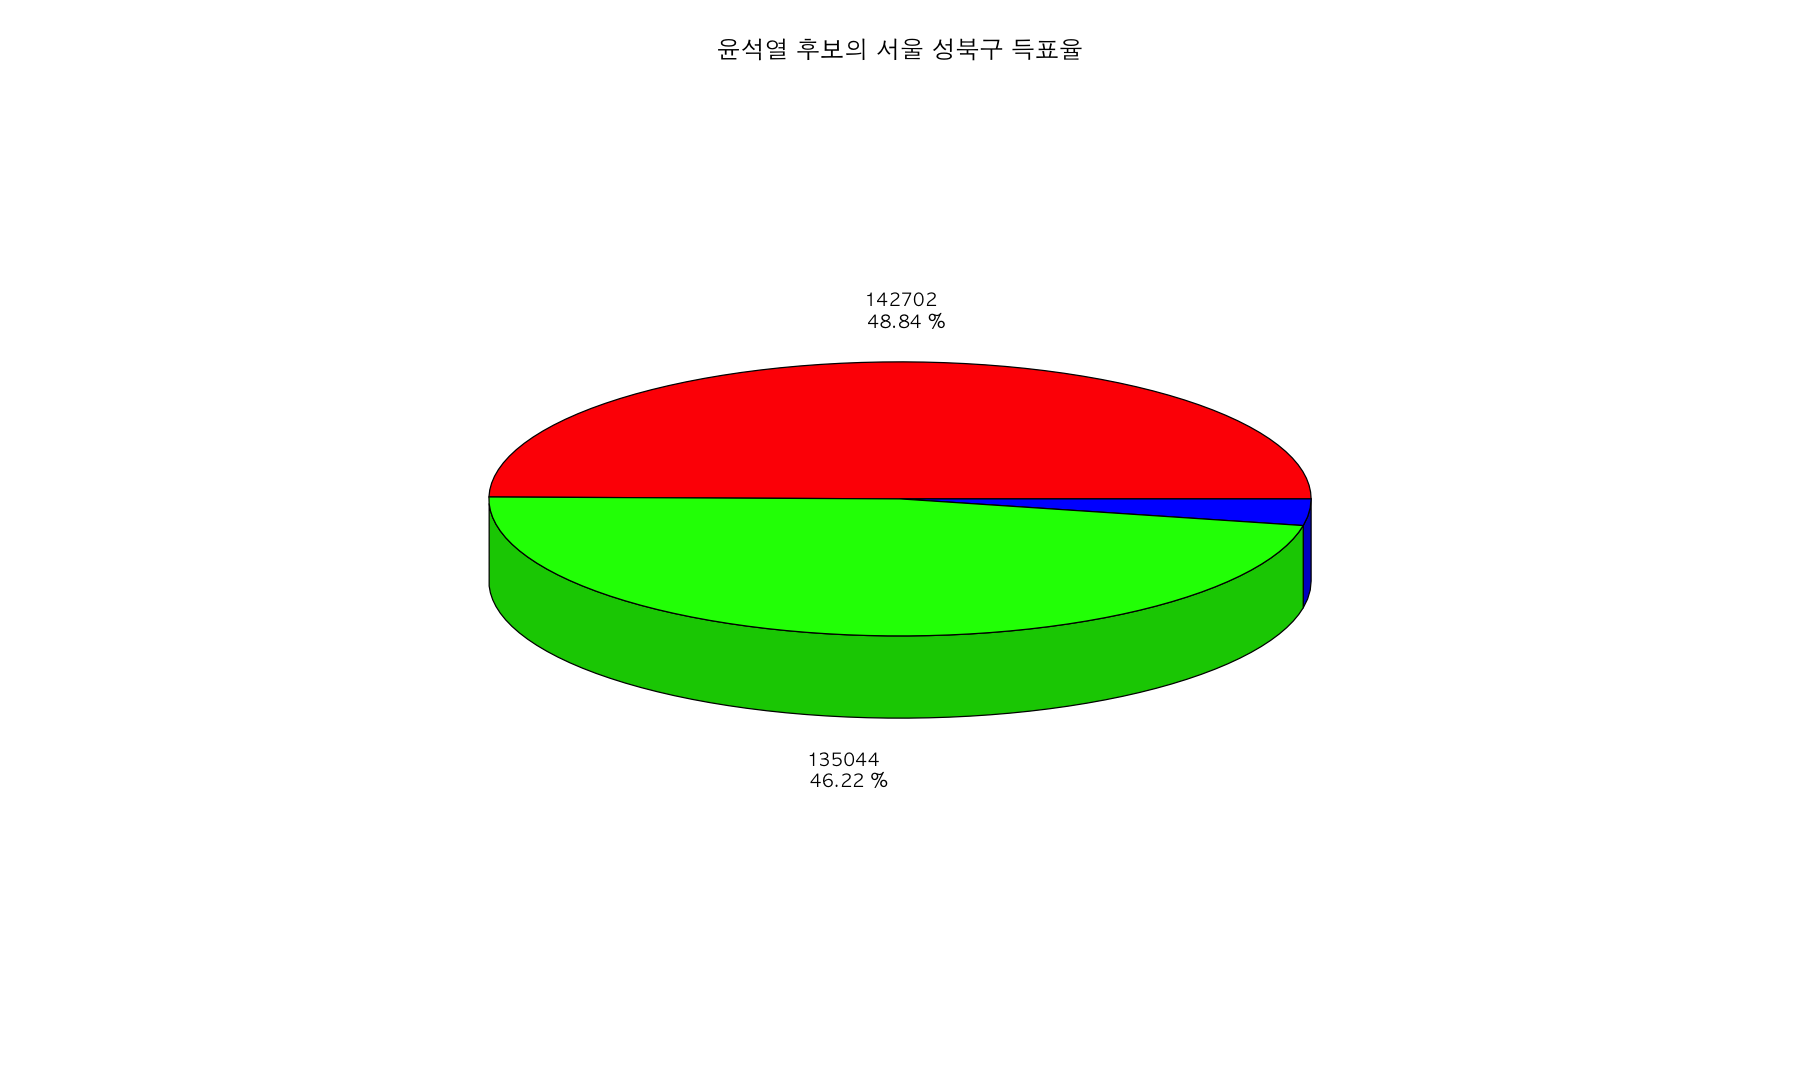

In [268]:
par(bg = "white")
par(family = "AppleGothic")
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기
# 성북구 각 후보 득표율
election_seoul <- election[election$`광역시도` == "서울특별시",]
head(election_seoul)
election_sungbuk <- election_seoul[election_seoul$시군구 == "성북구",]
head(election_sungbuk)

#Ratio
# election_sungbuk[1,1:7]
# election_sungbuk[-c(1),1:7]
# c(election_sungbuk[1,1:7], sum(election_sungbuk[-c(1),1:7]))/sum(election_sungbuk$`투표수`)*100

#이재명 #윤석렬 #심상정 #기타
election_sungbuk[1,5]
election_sungbuk[1,6]
election_sungbuk[1,7]
sum(election_sungbuk$투표수)-sum(election_sungbuk[1,5:7])
sum(election_sungbuk$투표수)

#Ratio
election_seoul_yoon_ratio <- as.double(round((election_sungbuk[1,5:7])/sum(election_sungbuk$투표수)*100,2))
election_seoul_yoon_ratio 

#labele
election_seoul_yoon_label <- paste(c(election_sungbuk[1,5:7], '기타'), "\n", election_seoul_yoon_ratio, "%")
election_seoul_yoon_label

pie3D(
    election_seoul_yoon_ratio,
    main = "윤석열 후보의 서울 성북구 득표율",
    labels = election_seoul_yoon_label,
    labelcex = 0.9
)


In [245]:
election_seoul <- election[election$`광역시도` == "서울특별시",]
election_sungbuk <- election_seoul[election_seoul$시군구 == "성북구",]
election_sungbuk

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
8,서울특별시,성북구,375880,292187,142702,135044,8952,46.21835,46.21835


In [317]:
election_sungbuk[1,5:7]/sum(election_sungbuk$투표수)

,이재명,윤석열,심상정
,<dbl>,<dbl>,<dbl>
8,0.4883927,0.4621835,0.03063791


### 투표수가 가낭 많은 지역의 각 후보별 득표수를 막대그래프로 그리기

In [342]:
# 지역별 이재명, 윤석열, 심상정 특표수합계

# 광역시도별 합계 및 
#차순정렬
elec_sum <- aggregate(투표수~광역시도, election, sum)
elec_sum_vot <- arrange(elec_sum, desc(투표수))
head(elec_sum_vot)


# 각 후보별 광역시 득표수
elec_sum_lee <- aggregate(이재명~광역시도, election, sum)
head(elec_sum_lee)

elec_sum_yoon <- aggregate(윤석열~광역시도, election, sum)
head(elec_sum_yoon)

elec_sum_sim <- aggregate(심상정~광역시도, election, sum)
head(elec_sum_sim)

elec_sum_table1 <- cbind(cbind(cbind(elec_sum_vot[1:2],elec_sum_lee[2]),elec_sum_yoon[2]),elec_sum_sim[2])
elec_sum_table1


# 각 후보별 득표수 하나로 결합
# com_elec_sum <- merge(x=elec_sum_lee, y=elec_sum_yoon, z=elec_sum_sim, by.x="광역시도", by.y="광역시도", by.z="광역시도") 
# susmdata <- cbind(elec_sum_lee, elec_sum_yoon, elec_sum_sim)
# list_of_dfs <- list(elec_sum_lee, elec_sum_yoon, elec_sum_sim)
# list_of_dfs
# com_elec_sum <- merge(elec_sum_lee, elec_sum_yoon, by = "광역시도", all = TRUE)


table1 <-merge(x=elec_sum_lee, y=elec_sum_yoon) 
table1
table2 <-merge(x=table1, y=elec_sum_sim) 
table2

elec_sum_table2 <- merge(merge(merge(x=elec_sum_vot, y=elec_sum_lee),elec_sum_youn),elec_sum_sim)
elec_sum_table2




#차순정렬
elec_sum <- aggregate(투표수~광역시도, table2, sum)
elec_no <- arrange(elec_sum, desc(투표수))
head(elec_no)


data <- arrange(table2, desc(table2$광역시도))
data


,광역시도,투표수
,<chr>,<int>
1,경기도,8518854
2,서울특별시,6501831
3,부산광역시,2200224
4,경상남도,2146882
5,인천광역시,1883504
6,경상북도,1774284


,광역시도,이재명
,<chr>,<int>
1,강원도,419644
2,경기도,4297931
3,경상남도,794130
4,경상북도,418371
5,광주광역시,830058
6,대구광역시,345045


,광역시도,윤석열
,<chr>,<int>
1,강원도,544980
2,경기도,3859666
3,경상남도,1237346
4,경상북도,1278922
5,광주광역시,124511
6,대구광역시,1199888


,광역시도,심상정
,<chr>,<int>
1,강원도,25031
2,경기도,201113
3,경상남도,52591
4,경상북도,33123
5,광주광역시,14865
6,대구광역시,31131


광역시도,투표수,이재명,윤석열,심상정
<chr>,<int>,<int>,<int>,<int>
경기도,8518854,419644,544980,25031
서울특별시,6501831,4297931,3859666,201113
부산광역시,2200224,794130,1237346,52591
경상남도,2146882,418371,1278922,33123
인천광역시,1883504,830058,124511,14865
경상북도,1774284,345045,1199888,31131
대구광역시,1611512,434950,464060,25445
충청남도,1324660,831896,1270072,47541
전라남도,1282168,2944981,3255747,180324


광역시도,이재명,윤석열
<chr>,<int>,<int>
강원도,419644,544980
경기도,4297931,3859666
경상남도,794130,1237346
경상북도,418371,1278922
광주광역시,830058,124511
대구광역시,345045,1199888
대전광역시,434950,464060
부산광역시,831896,1270072
서울특별시,2944981,3255747


광역시도,이재명,윤석열,심상정
<chr>,<int>,<int>,<int>
강원도,419644,544980,25031
경기도,4297931,3859666,201113
경상남도,794130,1237346,52591
경상북도,418371,1278922,33123
광주광역시,830058,124511,14865
대구광역시,345045,1199888,31131
대전광역시,434950,464060,25445
부산광역시,831896,1270072,47541
서울특별시,2944981,3255747,180324


ERROR: Error in eval(expr, envir, enclos): 객체 'elec_sum_youn'를 찾을 수 없습니다


In [286]:
par(family = "AppleGothic")
par(bg = "white")

barplot(
    VADeaths,
    beside=T, #옆으로
    main ="투표자수가 가장 많은 지역의 각 후보별 득표수",
    names = c(),
    col = rainbow(nrow(VADeaths)),
    ylim = c(0,80)   
)

legend(
    7,   #(x축 7번째인 위치)
    80, #(y축의 80번 위치)
    # c("50-54","55-59","60-64","65-69","70-74"),
    c(rownames(VADeaths)),
    fill = rainbow(nrow(VADeaths)),
    cex = 0.8 #글자크기
    )


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electiond윤석렬Ratio,electiond윤석렬3Ratio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,48.86464,48.86464
2,서울특별시,중구,111448,84998,38244,42906,2310,50.47883,50.47883
3,서울특별시,용산구,199077,152068,60063,85047,4374,55.92695,55.92695
4,서울특별시,성동구,252087,197240,84411,103880,5365,52.66680,52.66680
5,서울특별시,광진구,303582,235471,109922,113733,7072,48.30022,48.30022
6,서울특별시,동대문구,300928,232106,108171,112890,6416,48.63726,48.63726


In [340]:
elec_top5 <- head(arrange(election, desc(투표수)),5)
elec_top5_matrix <- t(elec_top5[,5:7])
colnames(elec_top5_matrix) <- paste(elec_top5$`광영시도`, elec_top5$`시군구`)
elec_top5_matrix

,화성시,부천시,남양주시,송파구,강서구
이재명,283324,285227,239179,180490,190000
윤석열,236055,224331,203075,255166,181510
심상정,12955,13249,10089,10652,11100


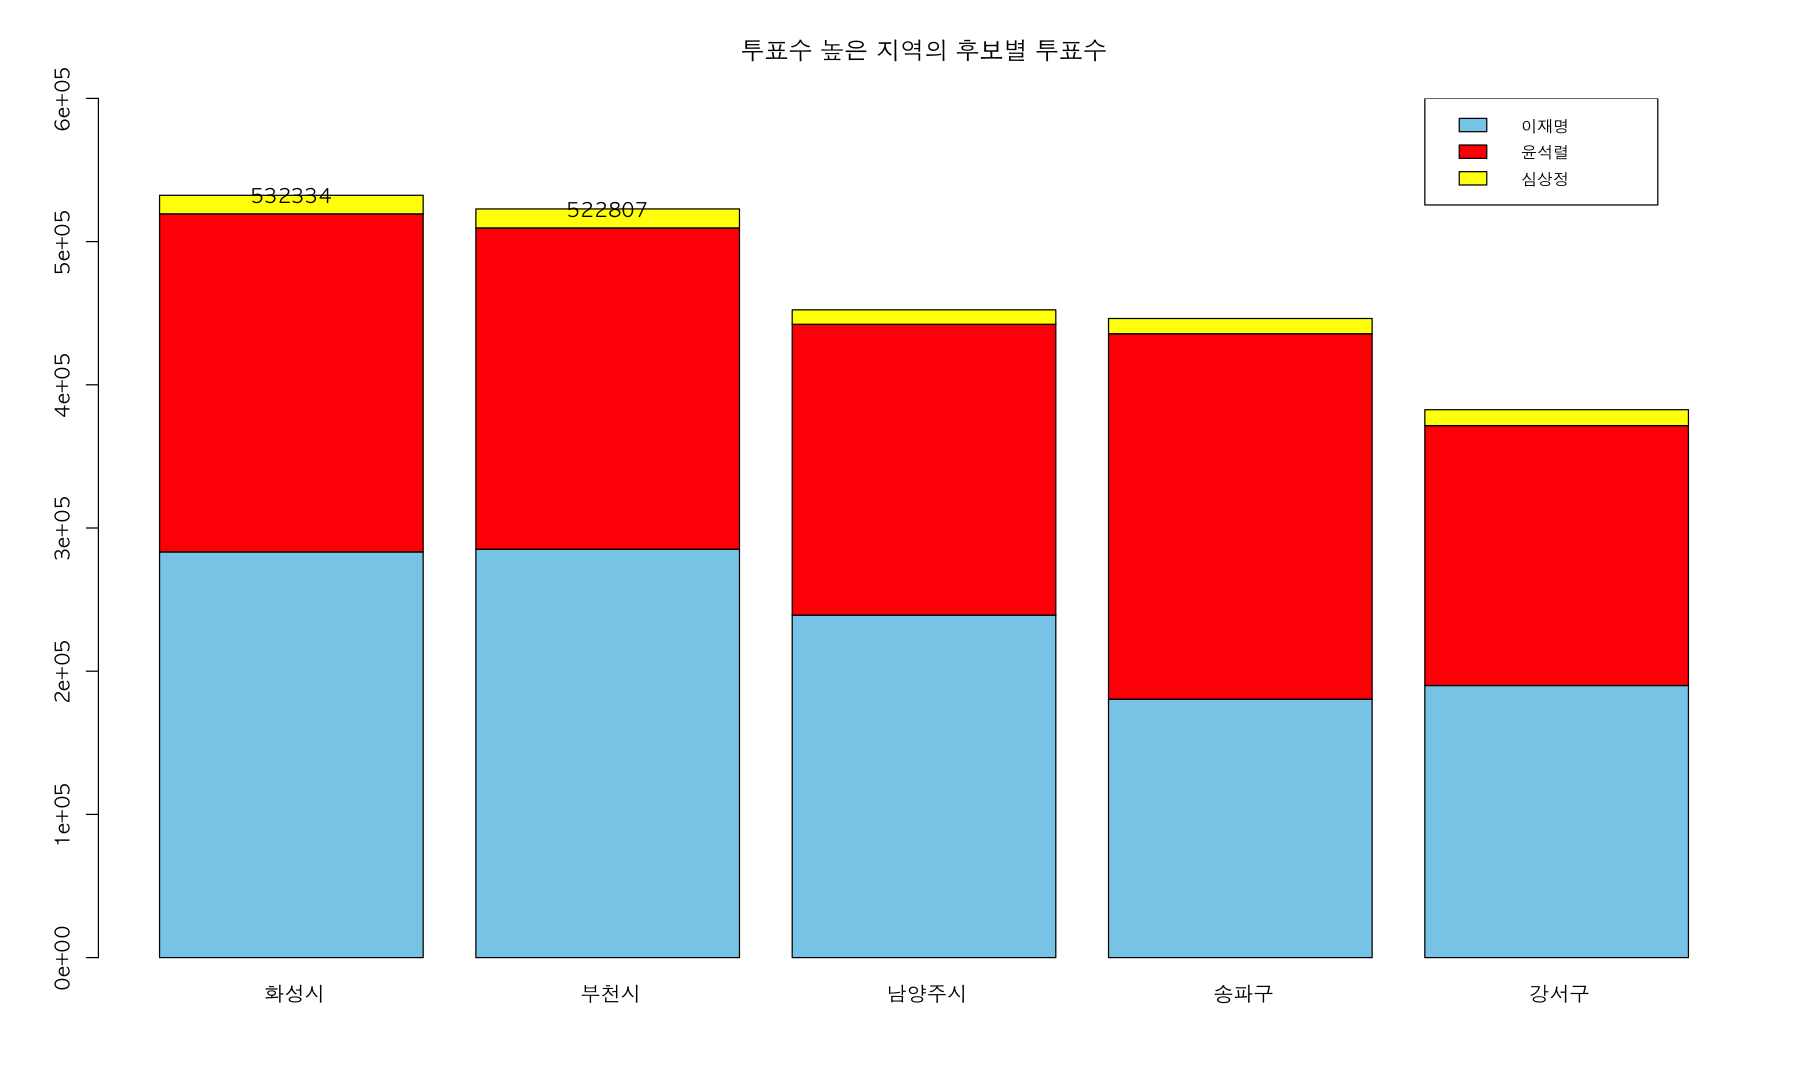

In [430]:
par(family = "AppleGothic")
par(bg = "white")
barplot(
    elec_top5_matrix,
    main = "투표수 높은 지역의 후보별 투표수",
    ylim = c(0,600000), #y축 범위조절
    col = c("skyblue","red","yellow"),
)
legend(
    5,   #(x축 5번째인 위치)
    600000, #(y축의 600000번 위치)
    c("이재명","윤석렬", "심상정"),
    c(rownames(VADeaths)),
    fill = c("skyblue","red","yellow"),,
    cex = 0.8, #글자크기
    )

#글자쓰기
text(0.7, sum(elec_top5_matrix[,1]), sum(elec_top5_matrix[,1]))
text(1.9, sum(elec_top5_matrix[,2]), sum(elec_top5_matrix[,2]))
text(1.9, sum(elec_top5_matrix[,2]), sum(elec_top5_matrix[,2]))

In [424]:
sum(elec_top5_matrix[,1])

[1] 532334

### 선 굵기 변경하기

In [343]:
#그래프 환경설정
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height=9)
Sys.setlocale(category = 'LC_ALL' , locale = 'ko_KR.UTF-8') ## 한글보이기

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

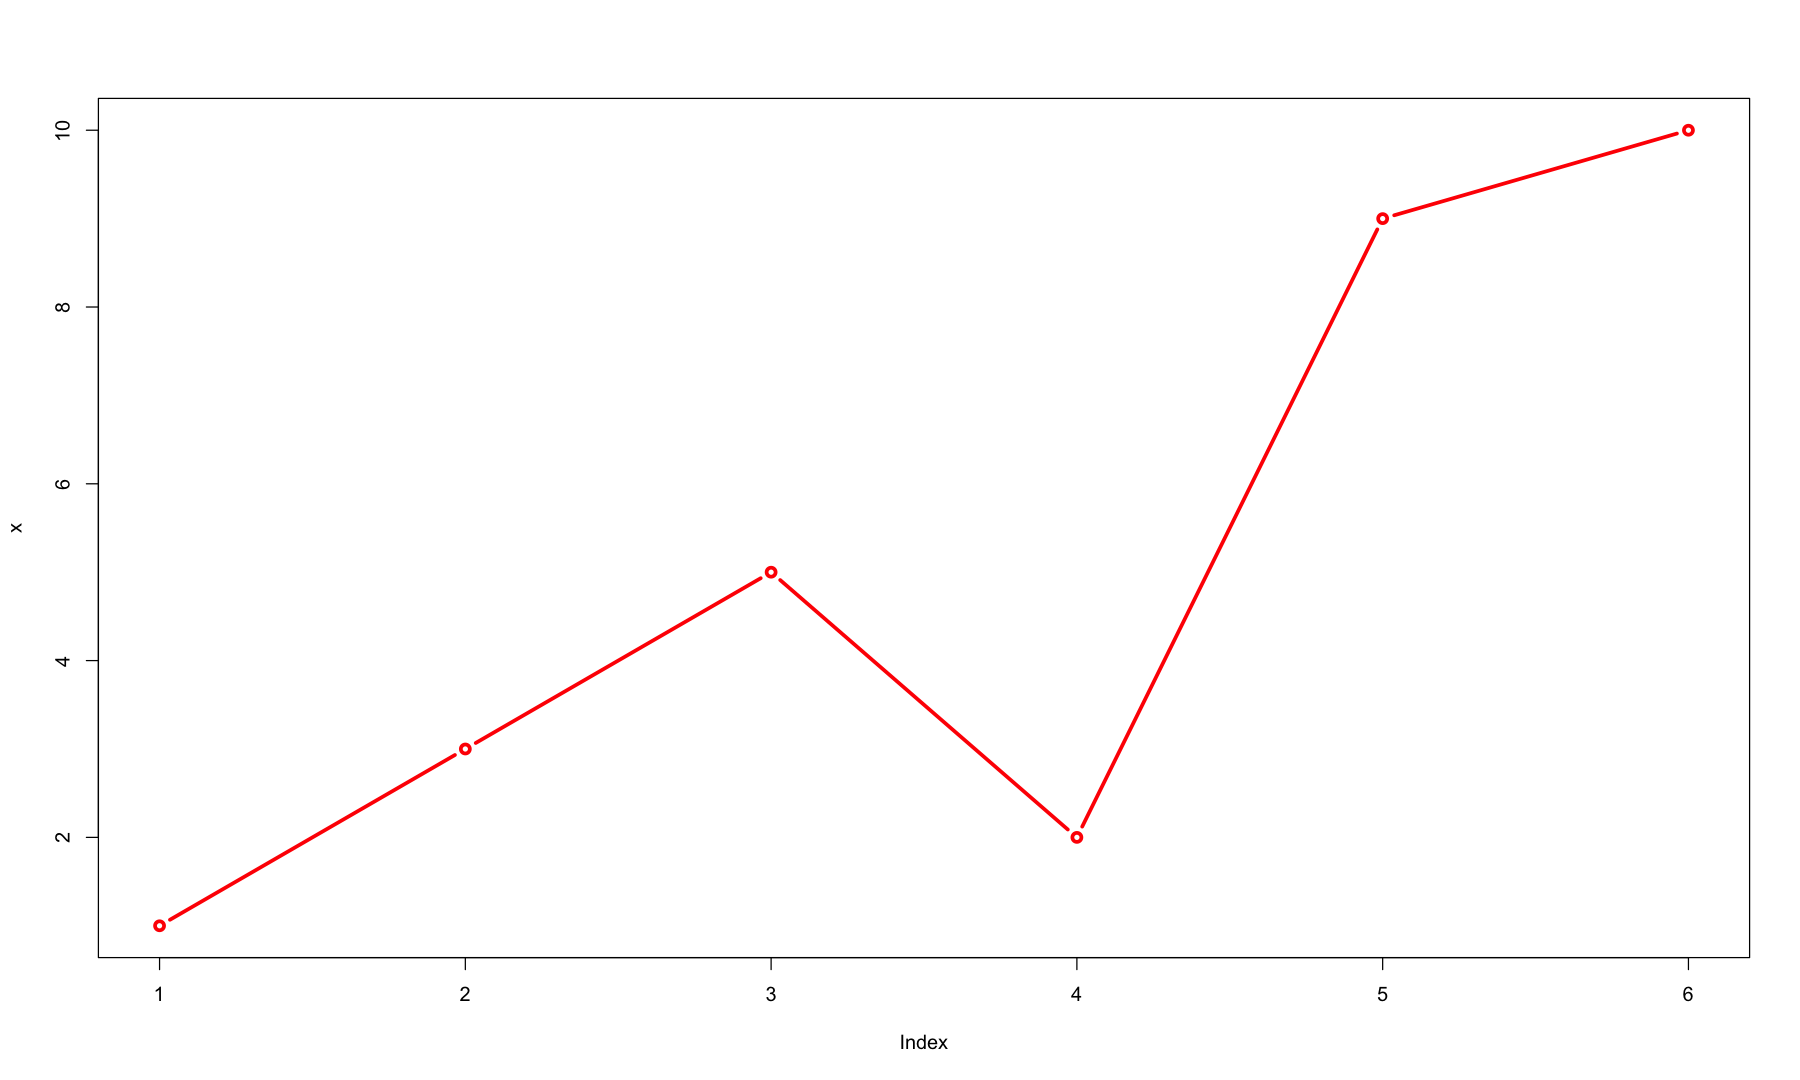

In [346]:

)

### 한 화면에 차트 여러개 그려서 비교하기

In [349]:
price <- runif(10, 1, 100)
price

[1] 22.62216 86.26099 65.65440 48.50639 37.32697 40.39558 73.81072 71.33000
 [9] 10.64259 35.58670

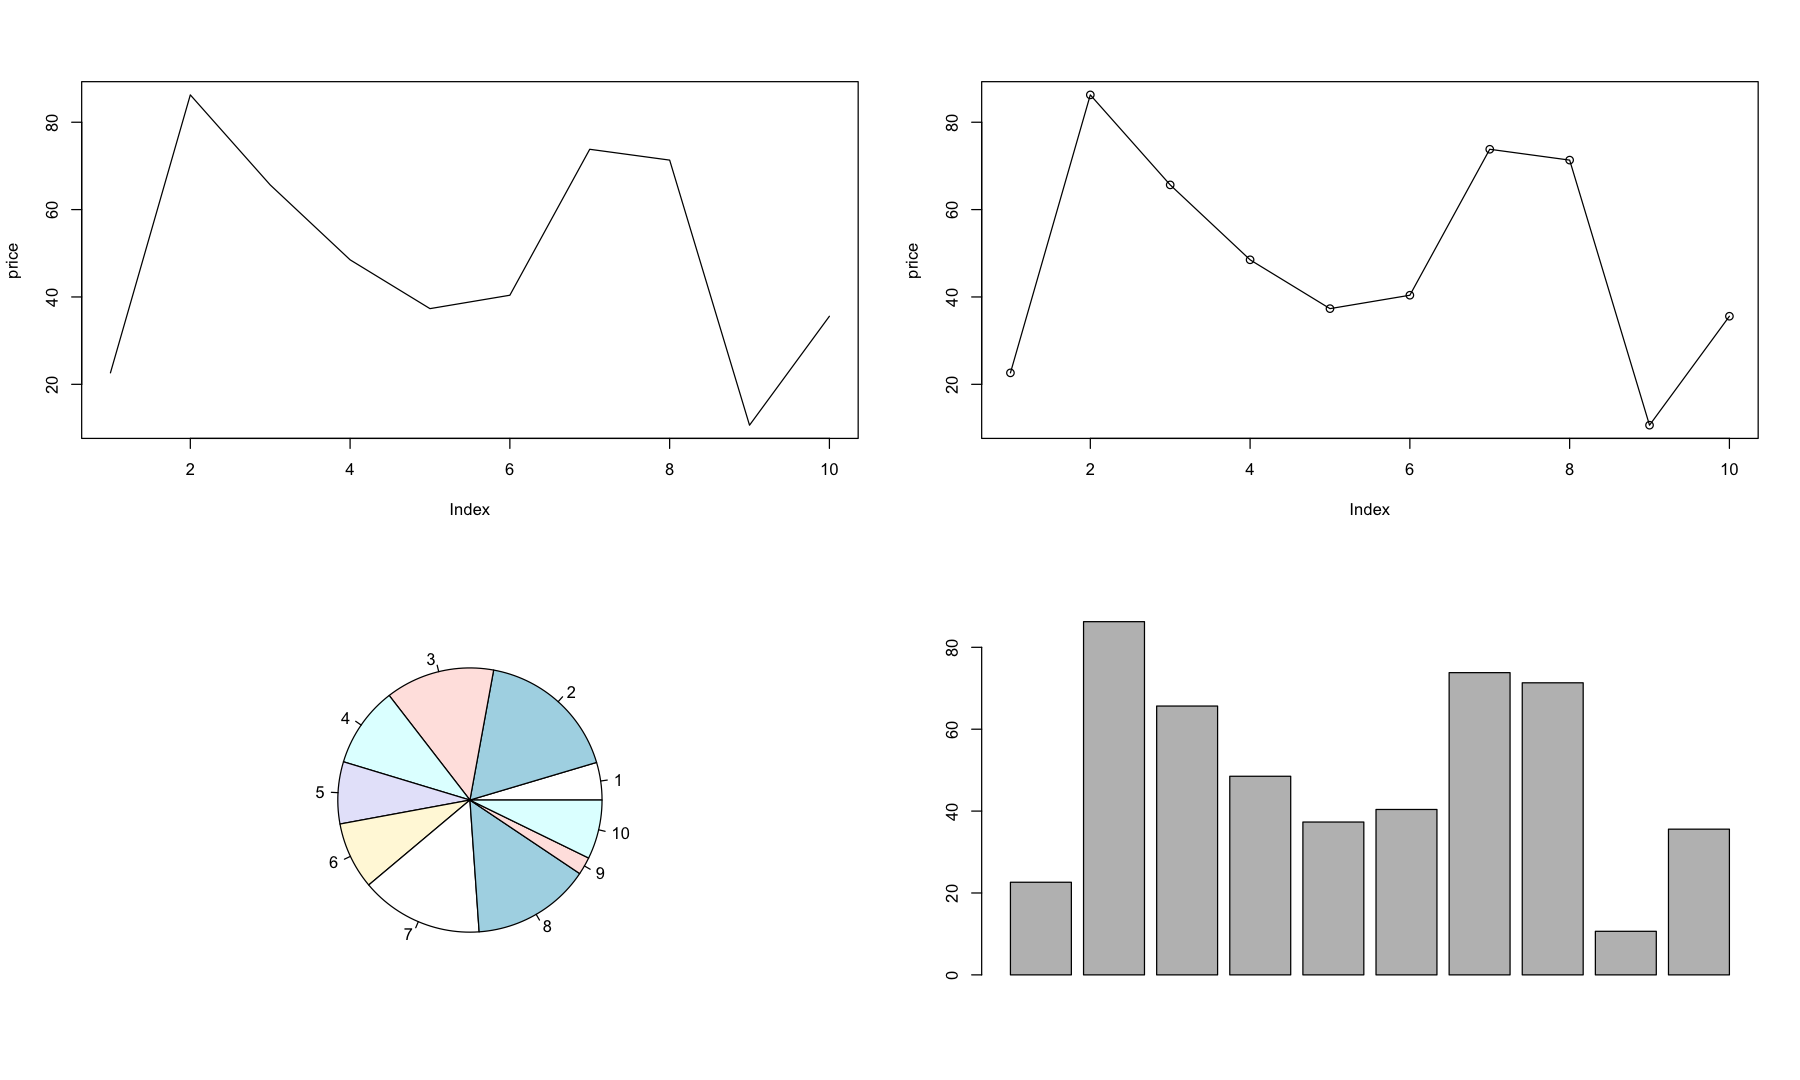

In [352]:
par(bg = "white")
#type 속성으로 비교하기
par(mfrow = c(2,2))  # 2행:2열로 보여주기
plot(price, type="l")
plot(price, type="o")
pie(price, type="h")
barplot(price, type="s")

### 중첩자료 시각화

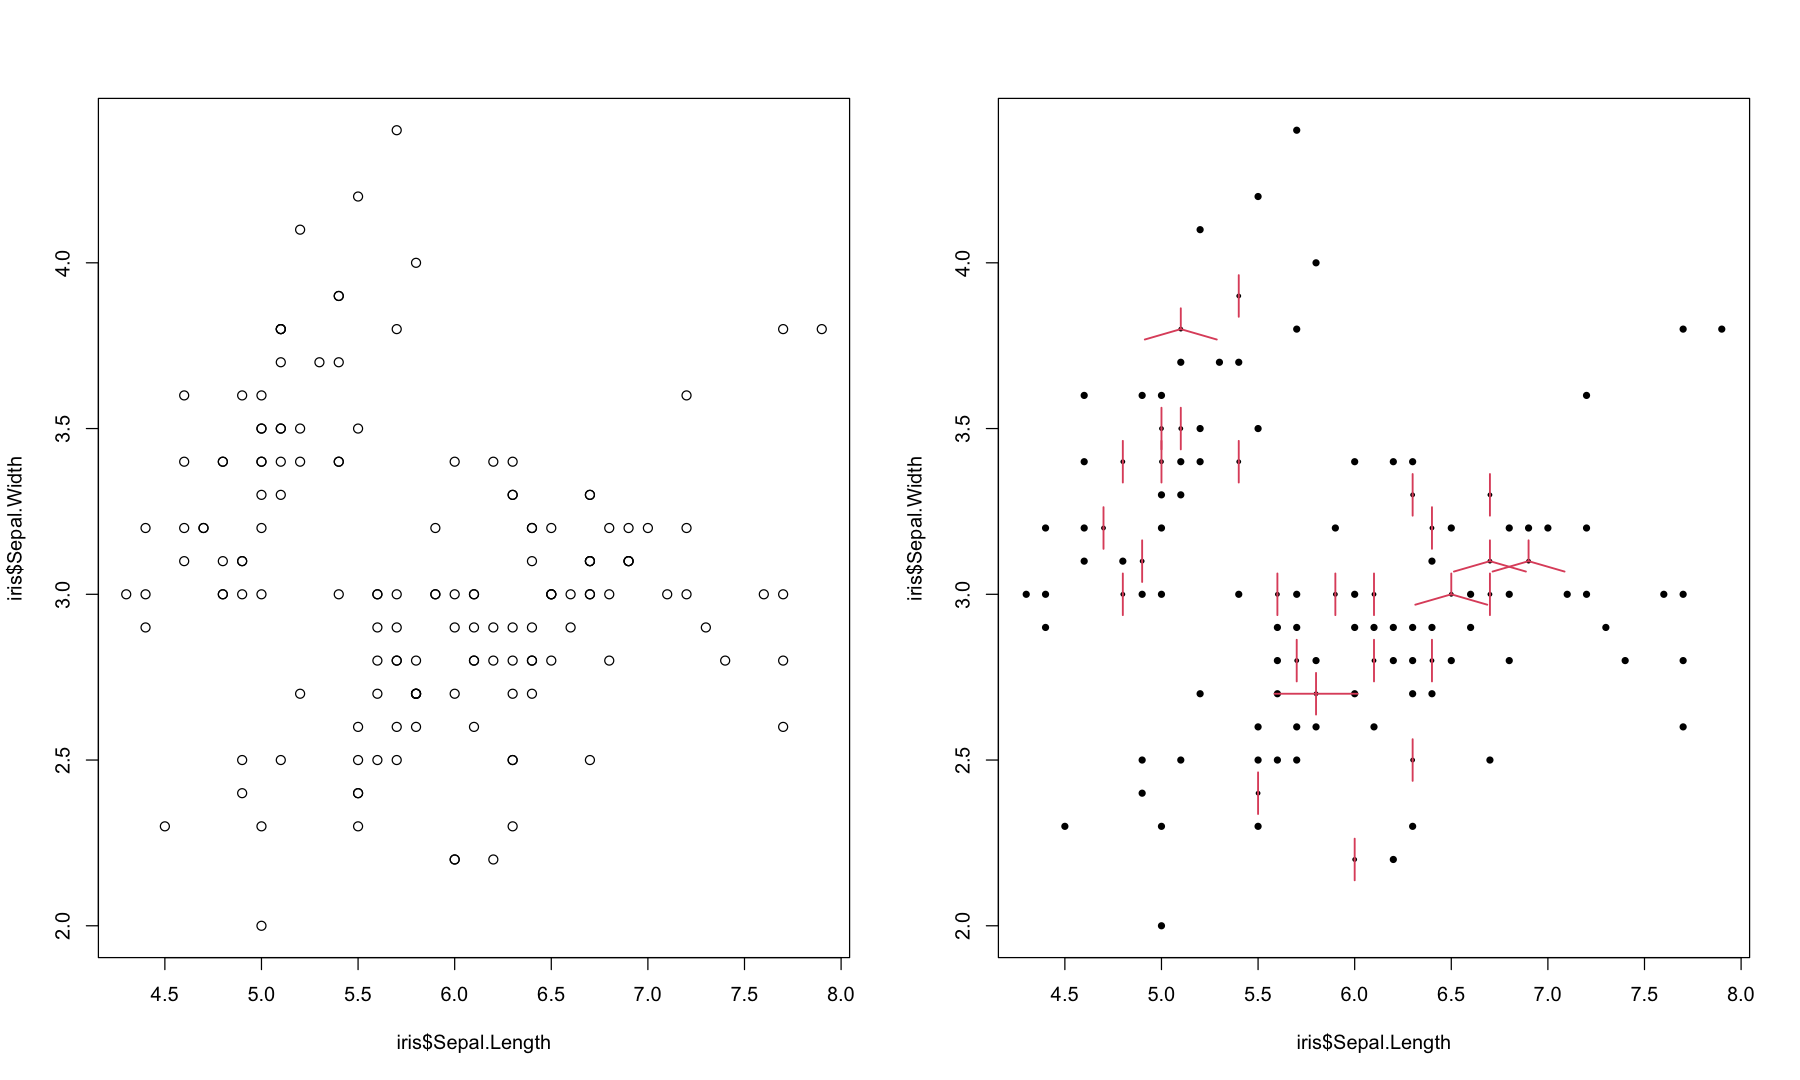

In [354]:
par(bg = "white")
par(mfrow = c(1,2))
plot(iris$Sepal.Length,iris$Sepal.Width)
sunflowerplot(iris$Sepal.Length,iris$Sepal.Width)

### chart 2개를 겹쳐서 출력하기

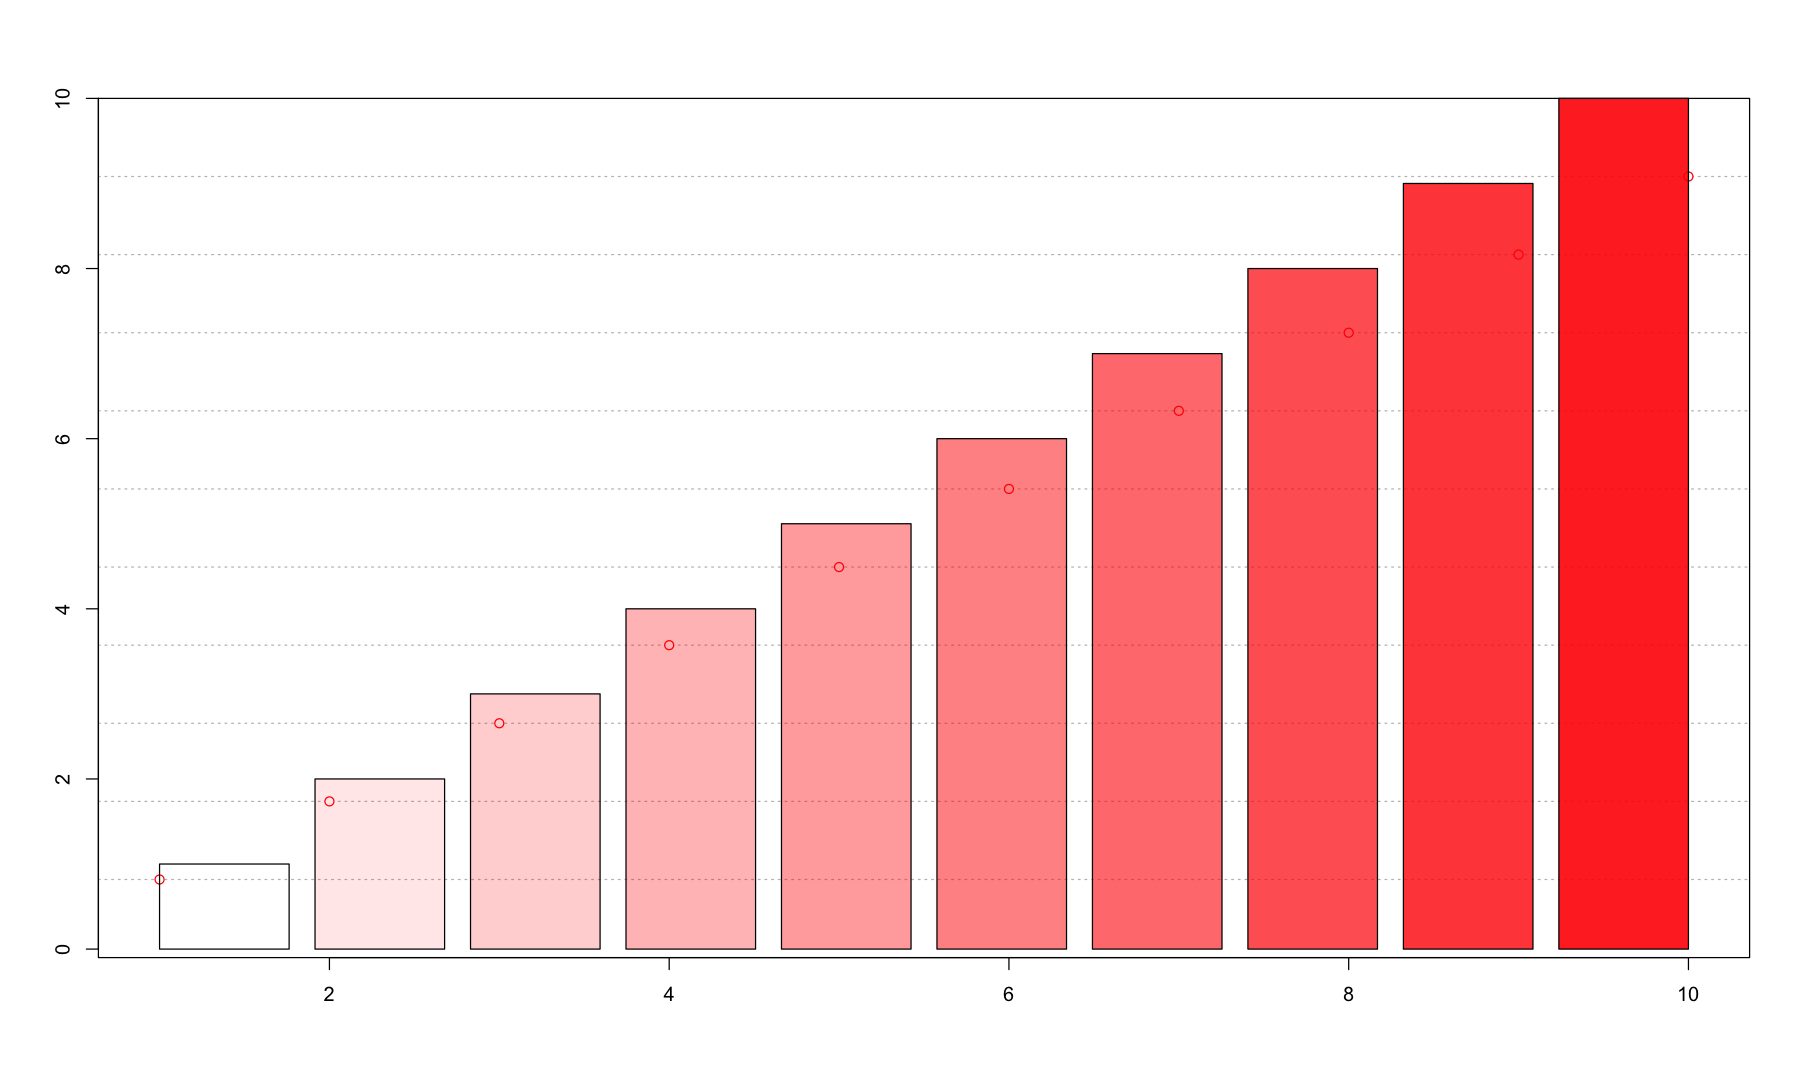

In [362]:
par(bg = "white")
x <- 1:10

mycol <- rgb(1,0,0,seq(0,1,0.1))
dotchart(x, col="red")
par(new = T) #현재 차트를 유지하고 다른 차트를 생성한다
barplot(
    x,
    col = mycol #그라데이션
    # col= rgb(1,1,0,0.5) #red,gree, blue, alpha
)

### 상자수염 그래프 !!!중요!!!

In [363]:
abc <- c(1,1,1,1,1,2,5)
summary(abc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.714   1.500   5.000 

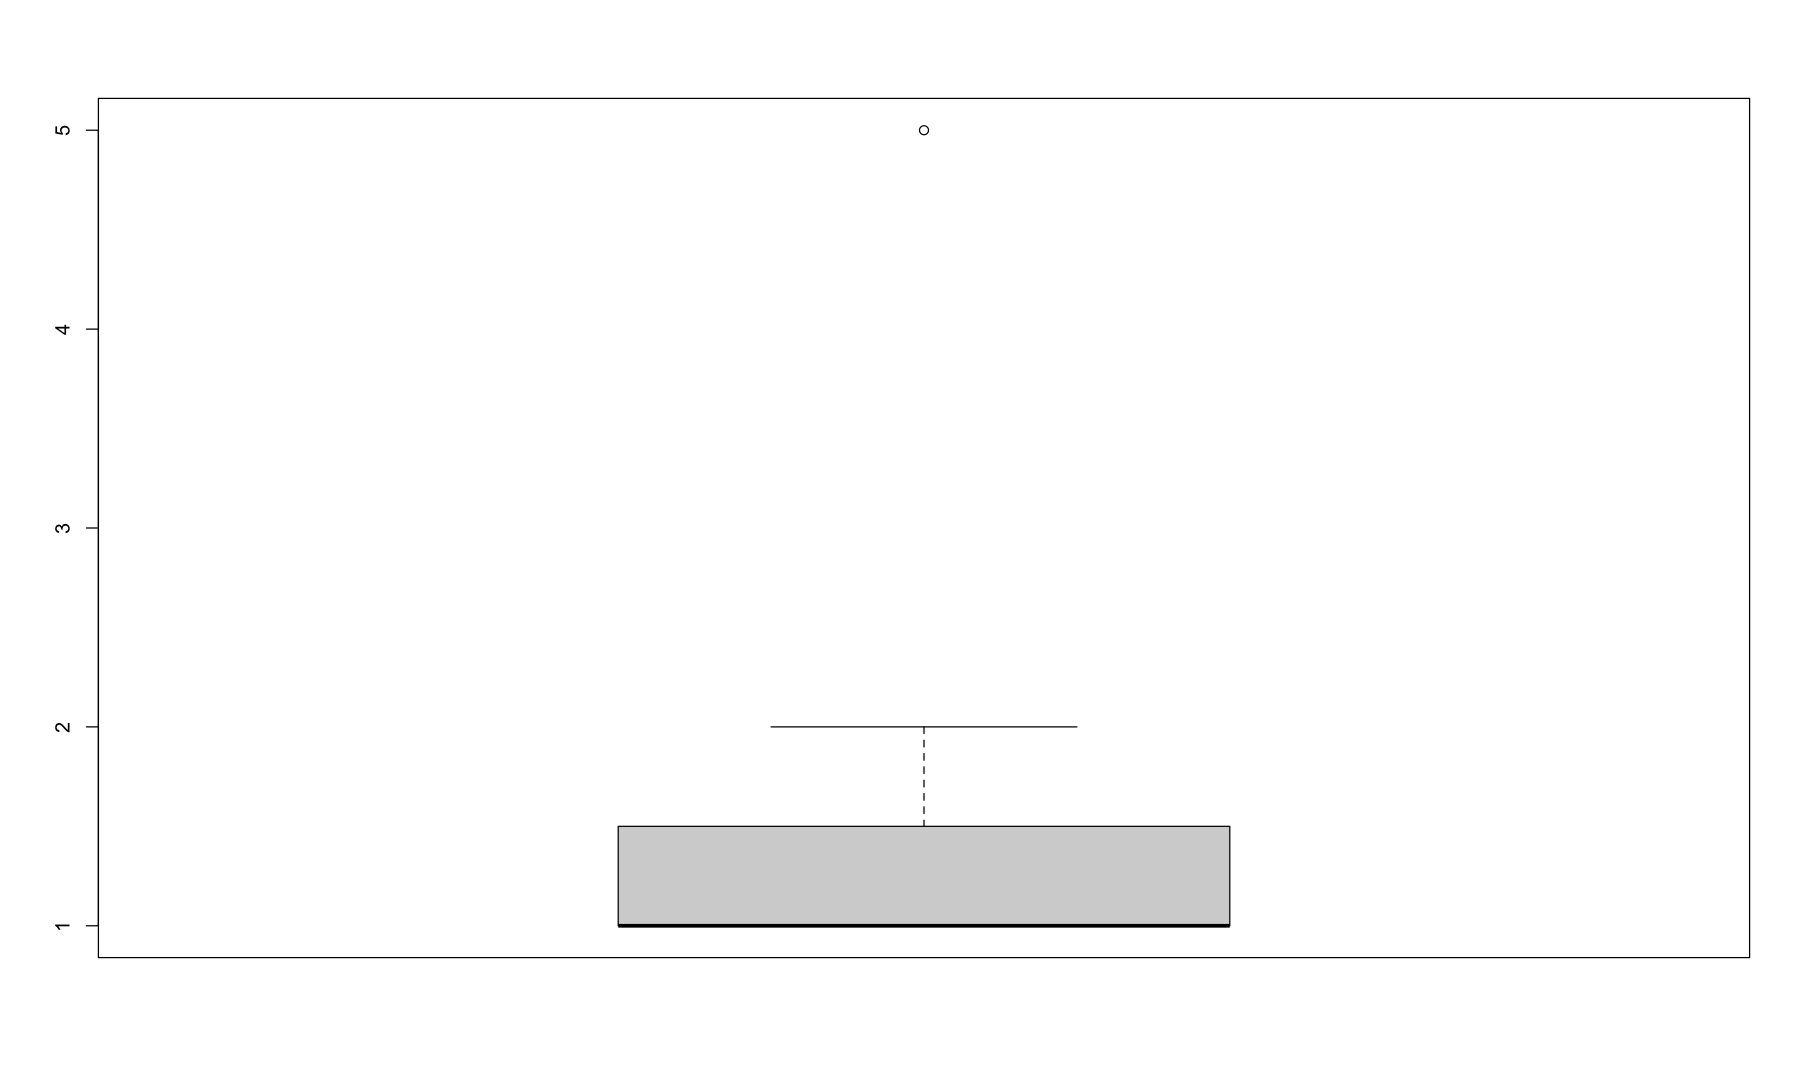

In [365]:
par(bg = "white")
boxplot(abc)

In [366]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


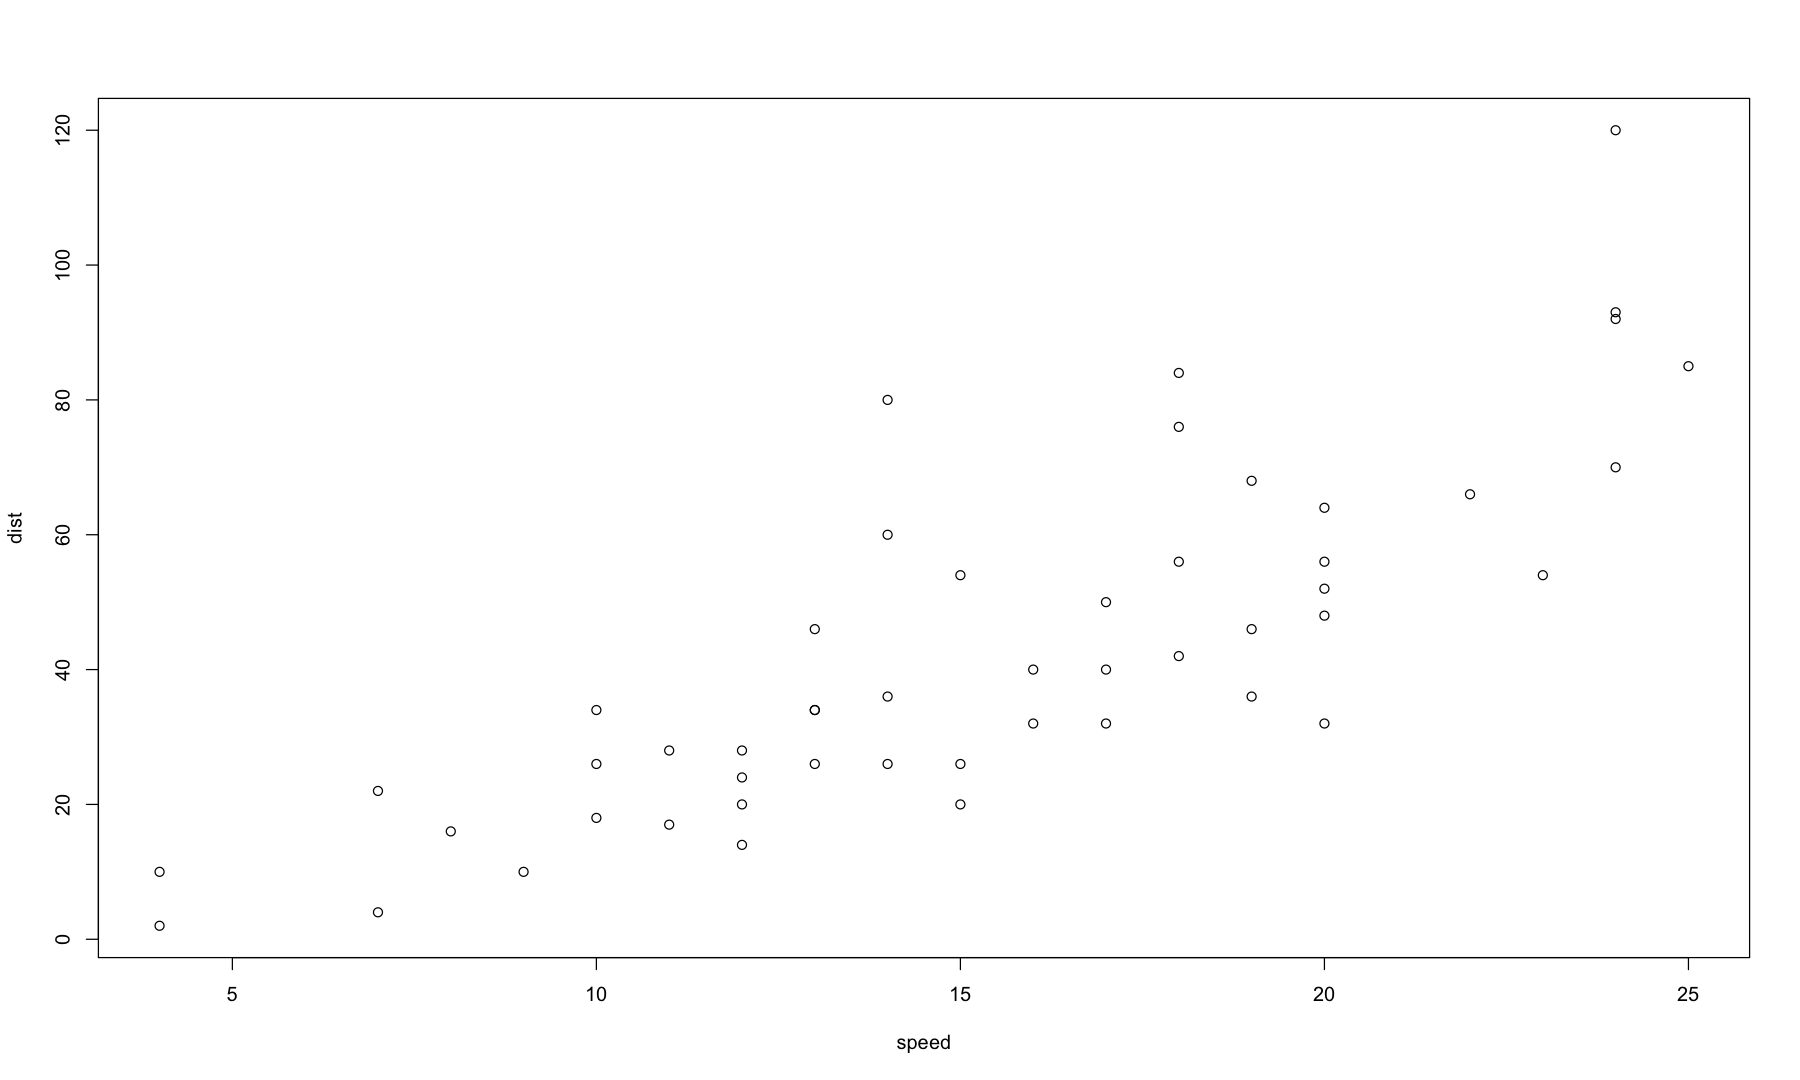

In [368]:
par(bg = "white")
plot(cars)

In [370]:
cor(cars) #상관도

,speed,dist
speed,1.0000000,0.8068949
dist,0.8068949,1.0000000


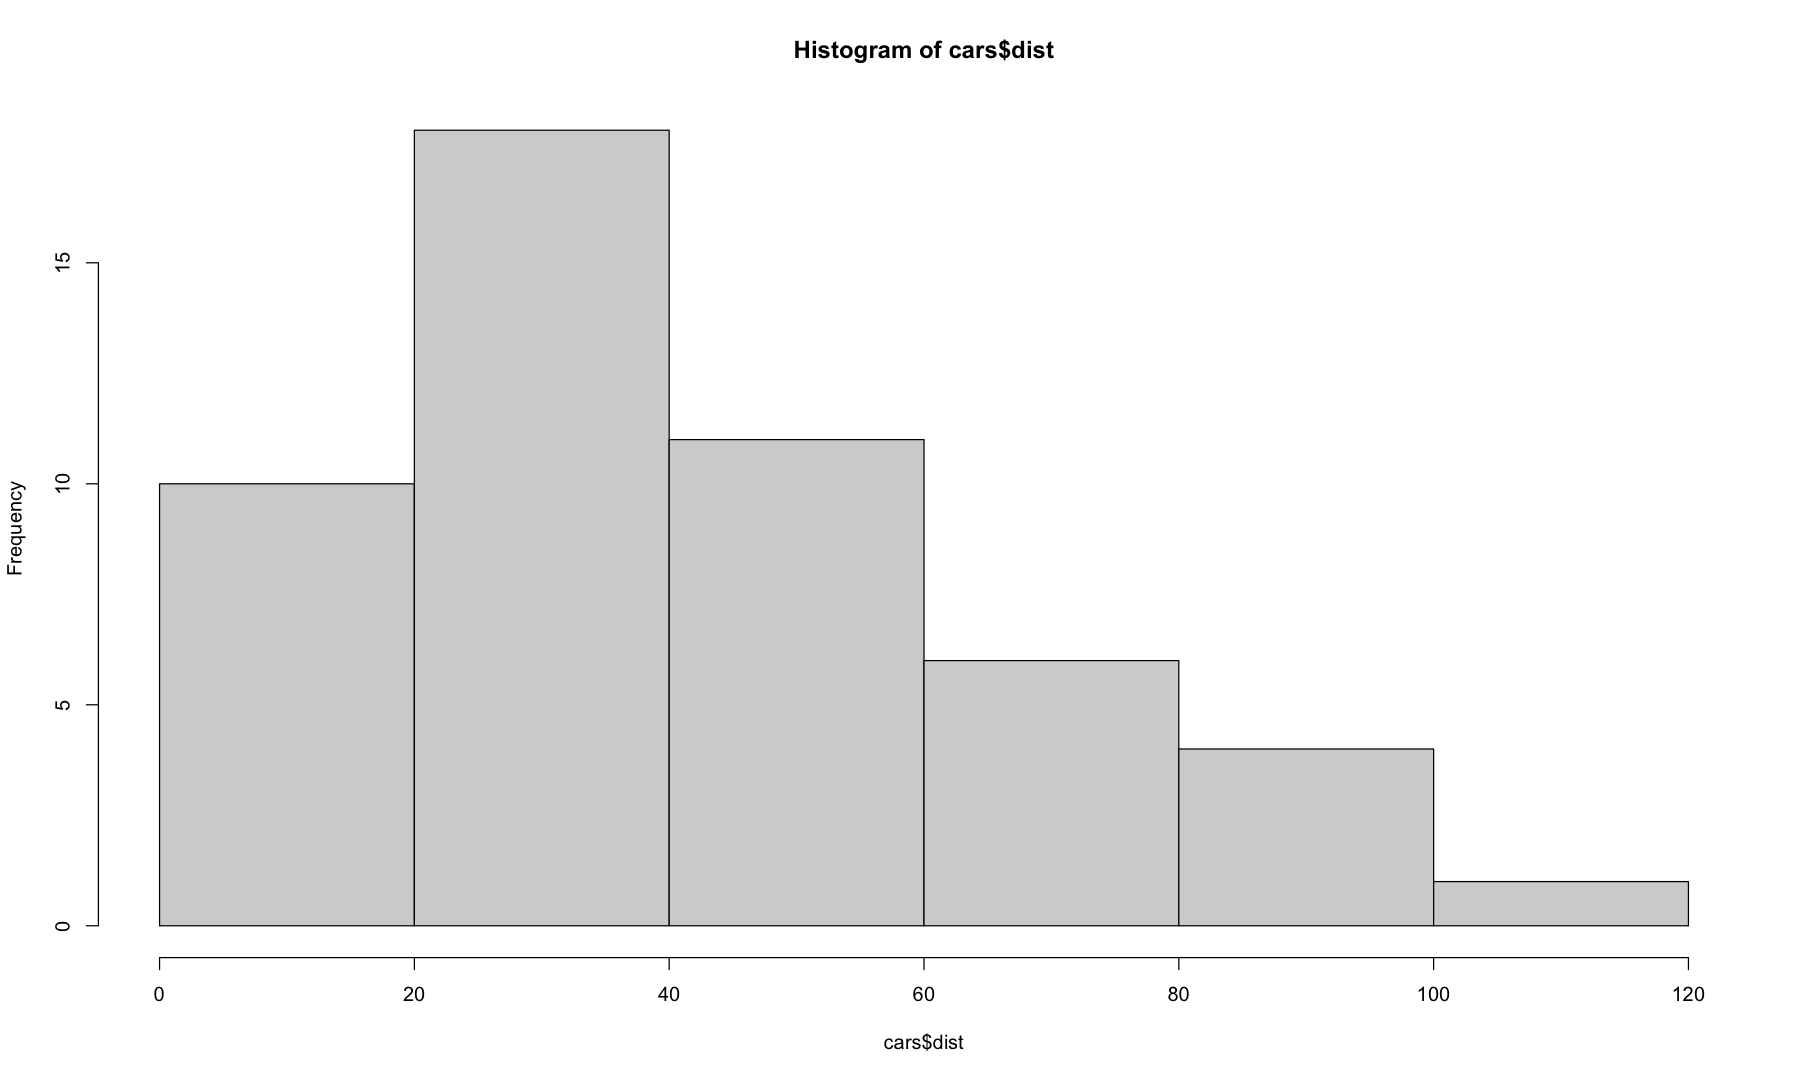

In [374]:
par(bg = "white")
hist(cars$dist)

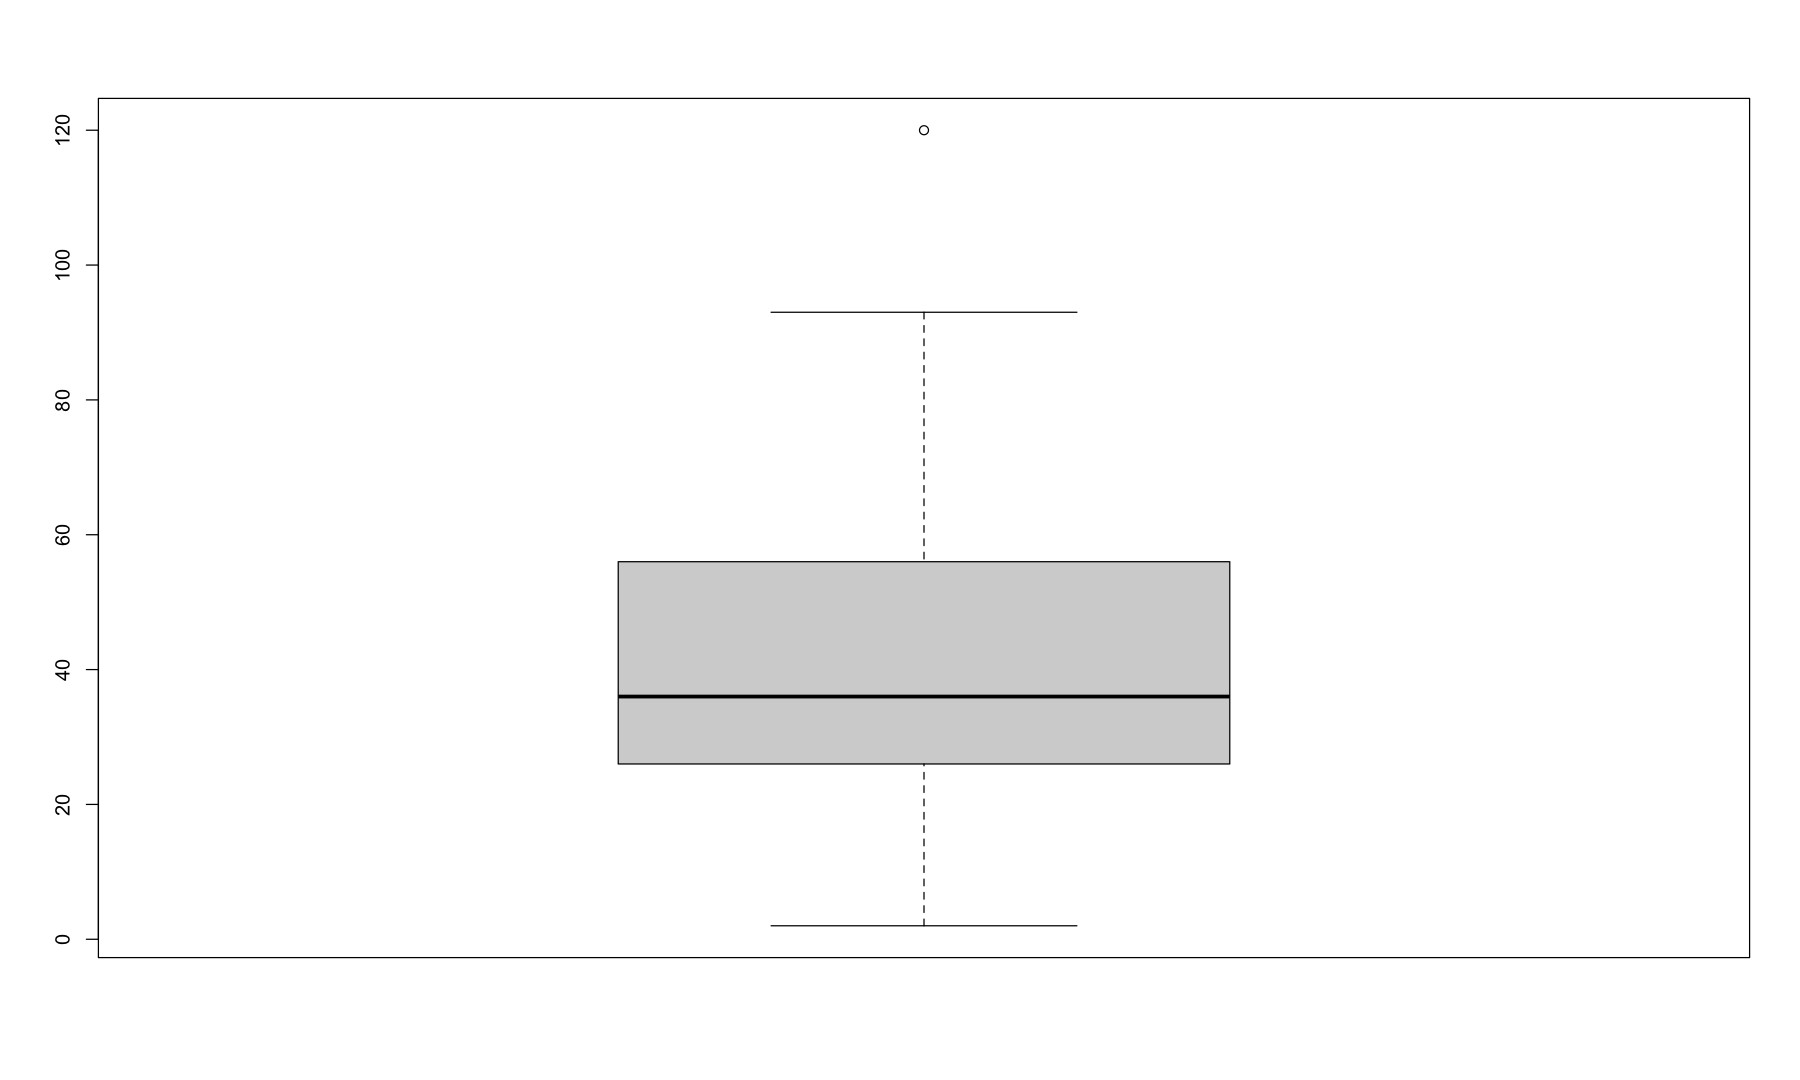

In [375]:
par(bg = "white")
boxplot(cars$dist)

### 기타 그래프

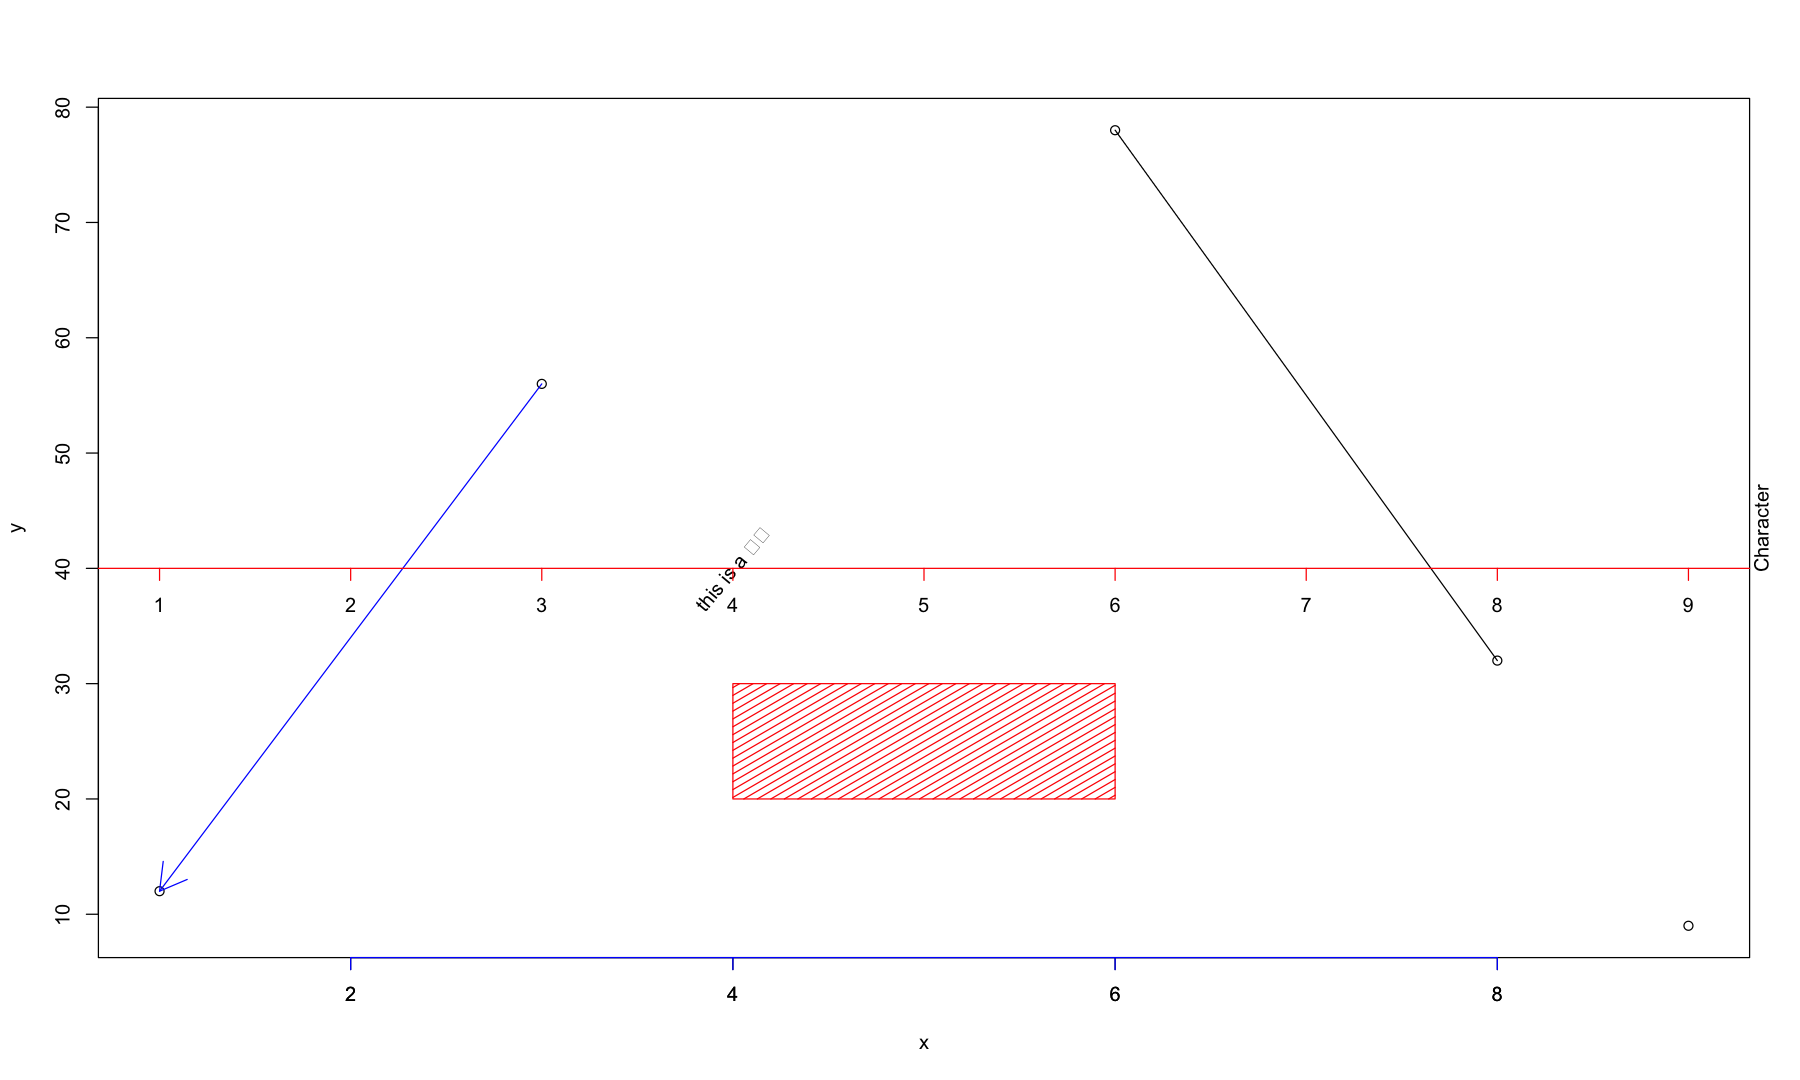

In [394]:
par(bg="white")
x <- c(1,3,6,8,9)
y <- c(12,56,78,32,9)
plot(x,y)

#선분 그리기(3,3)과 (4,4)
segments(6,78,8,32)

#화살표 그리기
arrows(3, 56, 1, 12, col="blue")

#사각형그리기
rect(4, 20, 6, 30, density = 30, col="red")

#글자쓰기
text(4,40, "this is a 샘플", srt=50)

#테두리 활용하기
mtext("Character", side=4, adj=0.5)

# x축의 추가 : y축의 40위치에 0~10까지 표시하고 색은 빨간색
axis(1, pos =40, at = 0:10, col = "red")

# y축의 추가 : x축의 6위치에 20~60까지 표시하고 파란색
axis(1, col ="blue")
